In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# load the wine data set
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url = 'winequality-red.csv'
df_wine = pd.read_csv(url, sep=",")
print("wine data set dimensions:", df_wine.shape)
df_wine.head()

wine data set dimensions: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


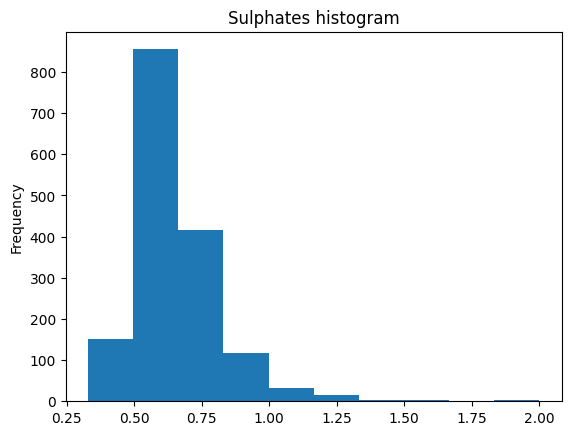

In [45]:
df_wine['sulphates'].plot(kind='hist', bins=10, title = 'Sulphates histogram');

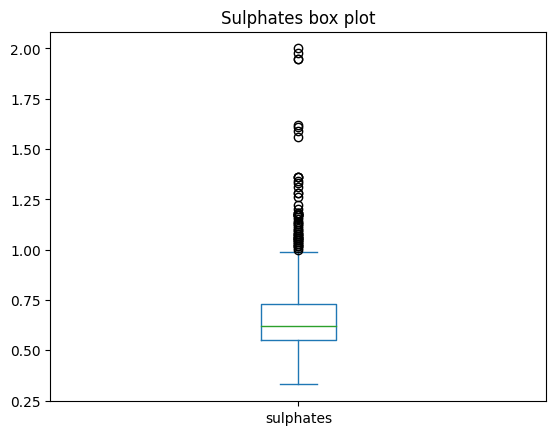

In [46]:
df_wine['sulphates'].plot.box(title = 'Sulphates box plot');

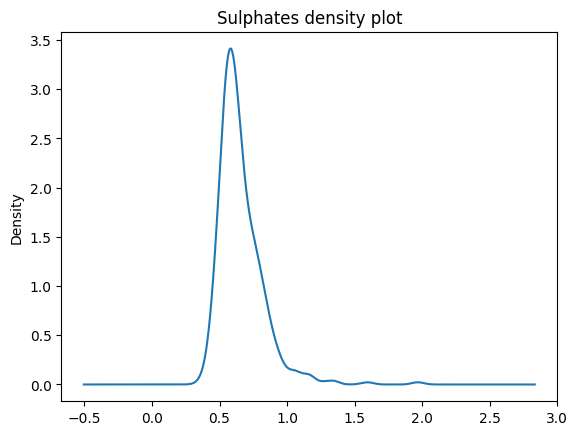

In [47]:
df_wine['sulphates'].plot.kde(title = 'Sulphates density plot');

[Text(0.5, 1.0, 'Alcohol (%vol) vs. sulphates ($g/dm^{3}$) plot\nPearson correlation = 0.09')]

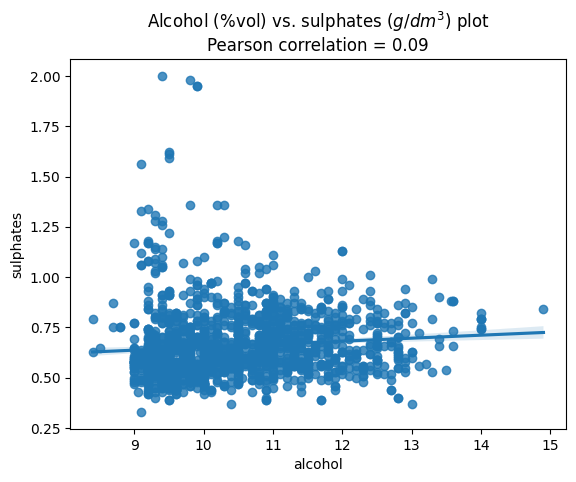

In [71]:
# check relation between alcohol and sulphates
corr = np.around(df_wine['alcohol'].corr(df_wine['sulphates']), decimals = 2)
title = r'Alcohol (%vol) vs. sulphates ($g/dm^{3}$) plot' + '\nPearson correlation = ' + str(corr)
# pandas plot
#df_wine.plot.scatter(title = title, x = 'alcohol', y = 'sulphates');
# seaborn plot with best fit
sns.regplot(data = df_wine, x = 'alcohol', y = 'sulphates').set(title=title)

Text(0.5, 0.98, 'Relationship between citric acid ($g/dm^{3}$), alcohol (%vol), and sulphates ($g/dm^{3}$)')

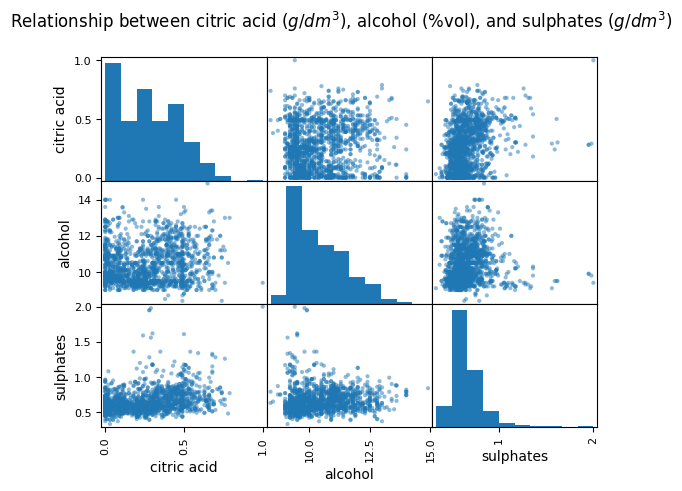

In [72]:
# scatter matrix of citric acid, alcohol, and sulphates
pd.plotting.scatter_matrix(df_wine[['citric acid', 'alcohol', 'sulphates']])
plt.suptitle(r'Relationship between citric acid ($g/dm^{3}$), alcohol (%vol), and sulphates ($g/dm^{3}$)')

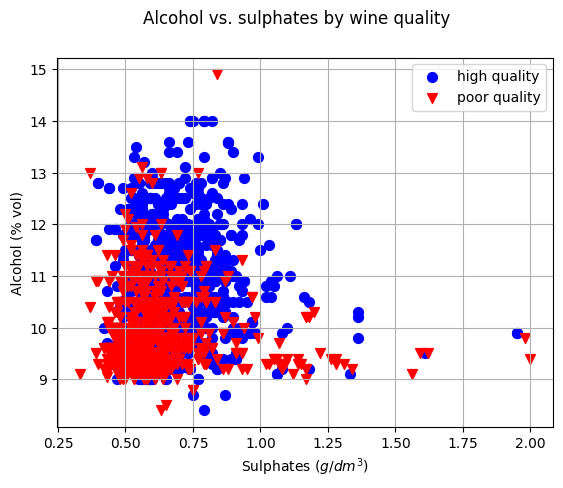

In [62]:
high = df_wine[['sulphates', 'alcohol']][df_wine['quality'] > 5]
low = df_wine[['sulphates', 'alcohol']][df_wine['quality'] <= 5]
plt.scatter(high['sulphates'],high['alcohol'],s=50,c='blue',marker='o',label='high quality')
plt.scatter(x=low['sulphates'],y=low['alcohol'],s=50,c='red',marker='v',label='poor quality')
plt.suptitle('Alcohol vs. sulphates by wine quality')
plt.xlabel(r'Sulphates ($g/dm^{3}$)')
plt.ylabel('Alcohol (% vol)')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Correlation between wine properties')

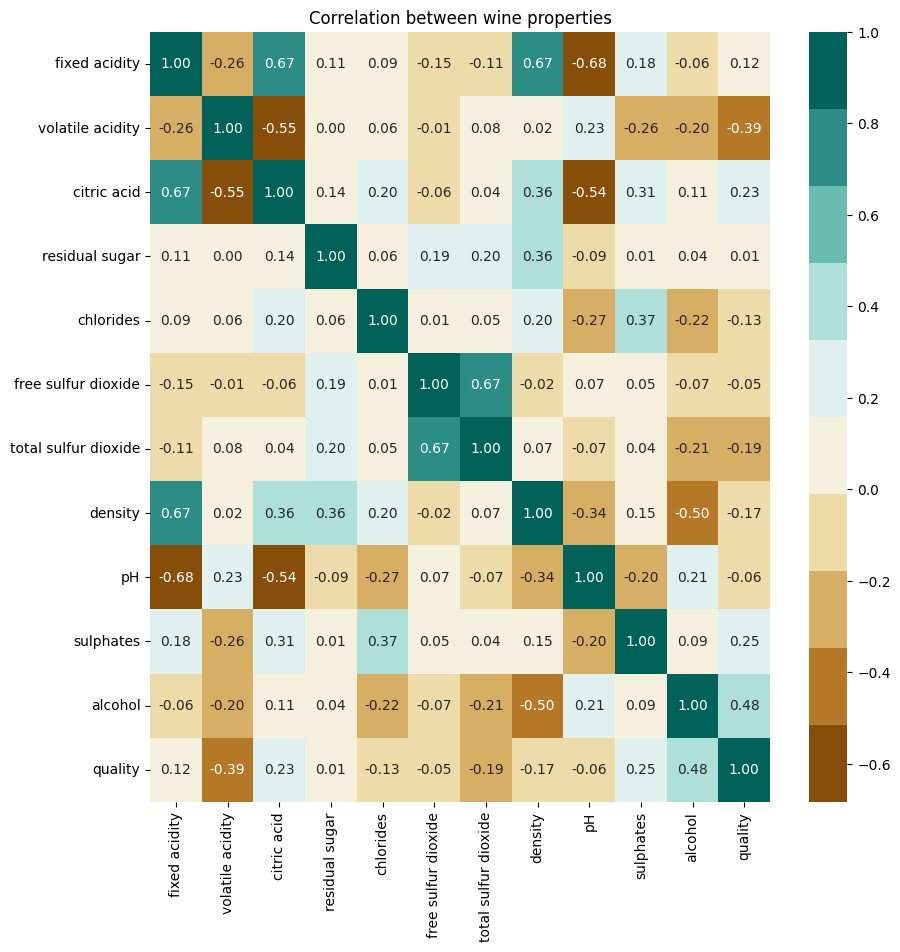

In [81]:
corr_matrix = df_wine.corr();
corr_matrix['quality'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt = ".2f")
plt.title('Correlations among wine properties')
#ax.set_yticklabels(column_names)
#print(df_wine.columns)

In [34]:
quality = df_wine.groupby('quality')